<a href="https://colab.research.google.com/github/sstepanychev/main/blob/master/%D0%98%D0%BD%D1%82%D0%B5%D0%BD%D1%81%D0%B8%D0%B2_%D0%A3%D0%98%D0%98_%D0%94%D0%B5%D0%BD%D1%8C_2_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Установка модуля УИИ
!rm -rf sample_data

import seaborn as sns
import random
import os
import numpy as np
import tensorflow as tf
import gdown
from IPython.display import clear_output

!pip -q install pymorphy2
!pip -q install python-Levenshtein

# Установочные параметры
sns.set(style='darkgrid')
seed_value = 12
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
if not os.path.exists('/content/IntensiveTerra'):
  os.mkdir('/content/IntensiveTerra')
os.chdir('/content/IntensiveTerra')

# Загрузка модуля
gdown.download('https://storage.yandexcloud.net/aiueducation/Intensive/intensivedaytwo.py', None, quiet=True)
gdown.download('https://storage.yandexcloud.net/aiueducation/Intensive/tools/check_for_errors.py', None, quiet=True)
gdown.download('https://storage.yandexcloud.net/aiueducation/Intensive/tools/dataset.py', None, quiet=True)
gdown.download('https://storage.yandexcloud.net/aiueducation/Intensive/tools/text_process.py', None, quiet=True)
gdown.download('https://storage.yandexcloud.net/aiueducation/Intensive/tools/квартиры.py', None, quiet=True)
gdown.download('https://storage.yandexcloud.net/aiueducation/Intensive/tools/модель.py', None, quiet=True)

import intensivedaytwo
demo_ai = intensivedaytwo.TerraIntensive()
clear_output(wait=True)

## **Классификация отзывов автомобиля Тесла**

In [ ]:
# Загрузка датасета
demo_ai.load_dataset('Отзывы_тесла')

Загрузка датасета Ok
Ифно:
    Вы скачали базу с отзывами на автомобиль «ТЕСЛА». База содержит 3381 отзыв двух категорий: «Позитивные», «Негативные»


In [ ]:
# Вывод примеров
demo_ai.samples()

Примеры:

Негативные:
   Очень расстроило плохое качество сборки. Но это ничего, через пару лет традиционные производители авто типа Ауди начнут выпускать электромобили, там с качеством сборки и материалов все будет ОК.
   К Тесле интерес ровно до тех пор пока не вышли концепты от Ауди и  Мерседес на электродвигателях
   Вас обманули, будущее за нефтью и газом, а мода на машинки на батарейках скоро пройдет.
   Машина какая то хлипкая, судя по ютьюбу, зачем такие двери сделали?
   И почему то практически все молчат о все тех же родных болячках на старте продаж плохая состыковка деталей корпуса.

Позитивные:
   Добротный автомобиль. 
   Едет быстро, тихо, ремонта не требует
   На эргономику тоже грех жаловаться – все просто и удобно. Подстаканников достаточно. То же самое можно сказать и о разъемах USB.
   Забавно, что Тесла молча объезжает топовые спорткары)))А вообще, машина топовая, но у нас пока не готовы к ее использованию
   Интересный автомобиль. Ждём дополнений. 5



Формирование выборки завершено

Размер созданных выборок для Embedding:
  Обучающая выборка: (8000, 50)
  Проверочная выборка: (200, 50)

Размер созданных выборок для BagOfWords:
  Обучающая выборка: (8000, 10000)
  Проверочная выборка: (200, 10000)

Размер созданных выборок для BagOfWords + PyMorphy:
  Обучающая выборка: (8000, 10000)
  Проверочная выборка: (200, 10000)

Метки:
  Метки обучающей выборки: (8000, 2)
  Метки проверочной выборки: (200, 2)

Распределение по классам:


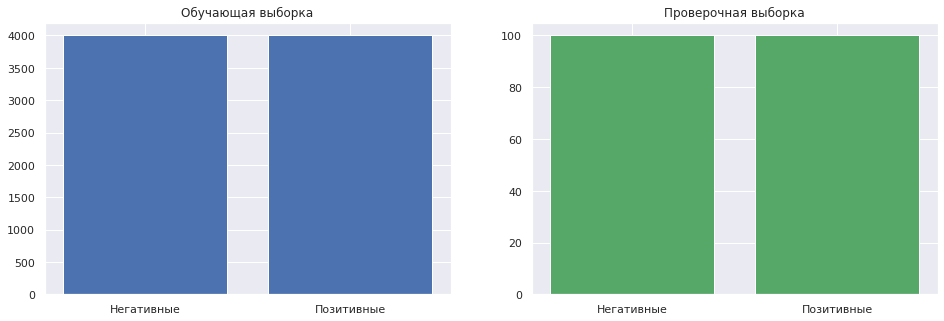

In [ ]:
# Задаем параметры для формирования выборок
vocab_size = '10000'
block_length = '50'
block_step = '50'

# Создание обучающей и проверочной выборок
demo_ai.create_sets(
    vocab_size,
    block_length,
    block_step,
)

**Эксперимент №1 (BagOfWords)**

In [ ]:
# Задание слоев нейронной сети
layers = 'Полносвязный-100\
 Полносвязный-2'

# Создание нейронной сети
demo_ai.create_model(layers, model_type='BagOfWords')

Создание модели нейронной сети Ok


Эпоха №1    Время обучения: 3.95c   Точность на обучающей выборке: 96.86%    Точность на проверочной выборке: 83.0%
Эпоха №2    Время обучения: 1.23c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.0%
Эпоха №3    Время обучения: 1.21c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.0%
Эпоха №4    Время обучения: 1.17c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.0%
Эпоха №5    Время обучения: 1.17c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.0%
Эпоха №6    Время обучения: 1.2c    Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.0%
Эпоха №7    Время обучения: 1.2c    Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.0%
Эпоха №8    Время обучения: 1.15c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.0%
Эпоха №9    Время обучения: 1.15c   Точность на обучающей выборке: 100.0

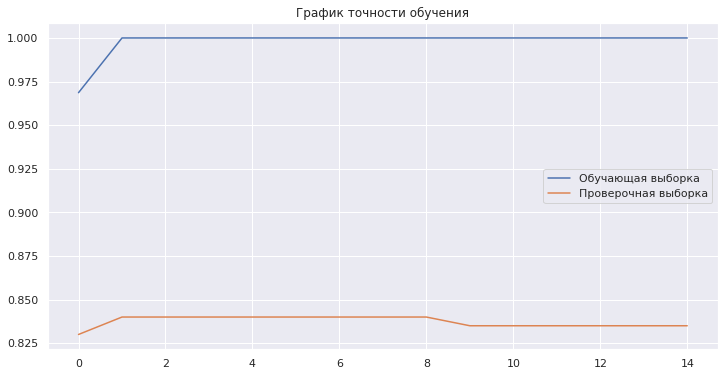

In [ ]:
# Обучение нейронной сети
demo_ai.train_model(epochs=15)

In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Машина супер скоростная. По трассе идет просто отлично! Однозначно брать',
    block_length,
    block_step
    )

Негативные     -  19.93 %
Позитивные     -  80.07 %

Нейросеть думает, что это: Позитивные - 80.07%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Самая быстрая красивая мощная',
    block_length,
    block_step
    )

Негативные     -  37.2 %
Позитивные     -  62.8 %

Нейросеть думает, что это: Позитивные - 62.8%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Обзор не очень, зеркала маленькие, заднее стекло тоже',
    block_length,
    block_step
    )


Негативные     -  61.79 %
Позитивные     -  38.21 %

Нейросеть думает, что это: Негативные - 61.79%


**Эксперимент №2 (BagOfWords)**

In [ ]:
# Задание слоев нейронной сети
layers = 'Полносвязный-800\
 Полносвязный-200\
 Полносвязный-2'

# Создание нейронной сети
demo_ai.create_model(layers, model_type='BagOfWords')

Создание модели нейронной сети Ok


Эпоха №1    Время обучения: 2.33c   Точность на обучающей выборке: 97.69%    Точность на проверочной выборке: 84.0%
Эпоха №2    Время обучения: 1.73c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.0%
Эпоха №3    Время обучения: 1.74c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.5%
Эпоха №4    Время обучения: 1.72c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.5%
Эпоха №5    Время обучения: 1.73c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.5%
Эпоха №6    Время обучения: 1.76c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.5%
Эпоха №7    Время обучения: 1.72c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.5%
Эпоха №8    Время обучения: 1.74c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.5%
Эпоха №9    Время обучения: 1.71c   Точность на обучающей выборке: 100.0

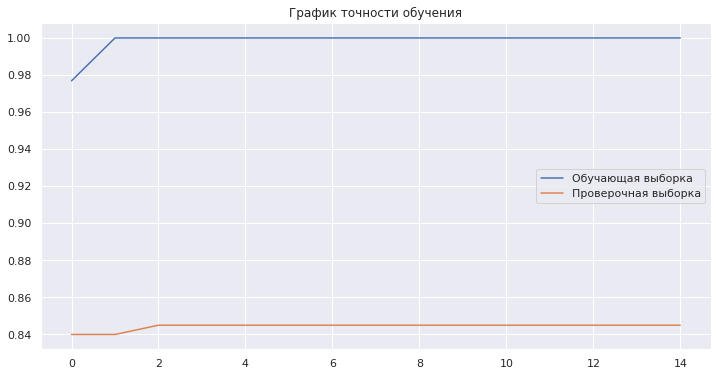

In [ ]:
# Обучение нейронной сети
demo_ai.train_model(epochs=15)

In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Машина супер скоростная. По трассе идет просто отлично! Однозначно брать',
    block_length,
    block_step
    )

Негативные     -  18.0 %
Позитивные     -  82.0 %

Нейросеть думает, что это: Позитивные - 82.0%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Самая быстрая красивая мощная',
    block_length,
    block_step
    )

Негативные     -  34.96 %
Позитивные     -  65.04 %

Нейросеть думает, что это: Позитивные - 65.04%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Обзор не очень, зеркала маленькие, заднее стекло тоже',
    block_length,
    block_step
    )


Негативные     -  55.89 %
Позитивные     -  44.11 %

Нейросеть думает, что это: Негативные - 55.89%


**Эксперимент №3 (BagOfWords+PyMorphy)**

In [ ]:
# Задание слоев нейронной сети
layers = 'Полносвязный-100\
 Полносвязный-2'

# Создание нейронной сети
demo_ai.create_model(layers, model_type='BagOfWords+PyMorphy')

Создание модели нейронной сети Ok


Эпоха №1    Время обучения: 1.73c   Точность на обучающей выборке: 61.36%    Точность на проверочной выборке: 61.0%
Эпоха №2    Время обучения: 1.24c   Точность на обучающей выборке: 64.63%    Точность на проверочной выборке: 60.5%
Эпоха №3    Время обучения: 1.82c   Точность на обучающей выборке: 65.45%    Точность на проверочной выборке: 61.0%
Эпоха №4    Время обучения: 1.58c   Точность на обучающей выборке: 66.11%    Точность на проверочной выборке: 61.0%
Эпоха №5    Время обучения: 1.36c   Точность на обучающей выборке: 66.87%    Точность на проверочной выборке: 63.0%
Эпоха №6    Время обучения: 1.24c   Точность на обучающей выборке: 67.45%    Точность на проверочной выборке: 62.5%
Эпоха №7    Время обучения: 1.23c   Точность на обучающей выборке: 68.15%    Точность на проверочной выборке: 62.5%
Эпоха №8    Время обучения: 1.23c   Точность на обучающей выборке: 69.05%    Точность на проверочной выборке: 61.0%
Эпоха №9    Время обучения: 1.29c   Точность на обучающей выборке: 70.13

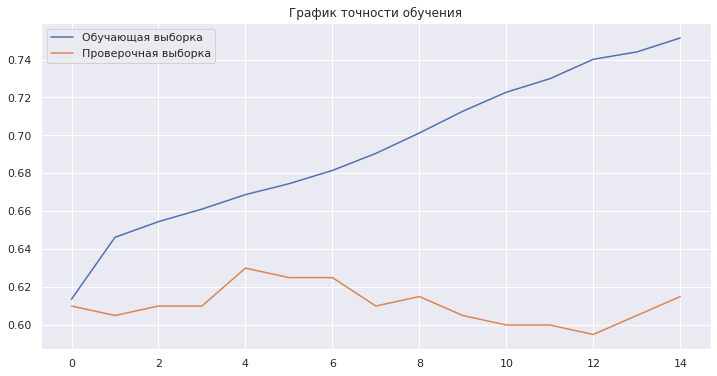

In [ ]:
# Обучение нейронной сети
demo_ai.train_model(epochs=15)

In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Машина супер скоростная. По трассе идет просто отлично! Однозначно брать',
    block_length,
    block_step
    )

Негативные     -  45.69 %
Позитивные     -  54.31 %

Нейросеть думает, что это: Позитивные - 54.31%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Самая быстрая красивая мощная',
    block_length,
    block_step
    )

Негативные     -  46.56 %
Позитивные     -  53.44 %

Нейросеть думает, что это: Позитивные - 53.44%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Обзор не очень, зеркала маленькие, заднее стекло тоже',
    block_length,
    block_step
    )


Негативные     -  45.94 %
Позитивные     -  54.06 %

Нейросеть думает, что это: Позитивные - 54.06%


**Эксперимент №4 (BagOfWords+PyMorphy)**

In [ ]:
# Задание слоев нейронной сети
layers = 'Полносвязный-800\
 Полносвязный-200\
 Полносвязный-2'

# Создание нейронной сети
demo_ai.create_model(layers, model_type='BagOfWords+PyMorphy')

Создание модели нейронной сети Ok


Эпоха №1    Время обучения: 2.31c   Точность на обучающей выборке: 62.48%    Точность на проверочной выборке: 59.0%
Эпоха №2    Время обучения: 1.73c   Точность на обучающей выборке: 71.1%     Точность на проверочной выборке: 58.0%
Эпоха №3    Время обучения: 1.76c   Точность на обучающей выборке: 79.95%    Точность на проверочной выборке: 61.0%
Эпоха №4    Время обучения: 1.74c   Точность на обучающей выборке: 88.74%    Точность на проверочной выборке: 57.5%
Эпоха №5    Время обучения: 1.74c   Точность на обучающей выборке: 94.34%    Точность на проверочной выборке: 57.5%
Эпоха №6    Время обучения: 1.75c   Точность на обучающей выборке: 97.59%    Точность на проверочной выборке: 54.5%
Эпоха №7    Время обучения: 1.78c   Точность на обучающей выборке: 98.96%    Точность на проверочной выборке: 59.0%
Эпоха №8    Время обучения: 1.75c   Точность на обучающей выборке: 99.19%    Точность на проверочной выборке: 56.5%
Эпоха №9    Время обучения: 1.74c   Точность на обучающей выборке: 99.54

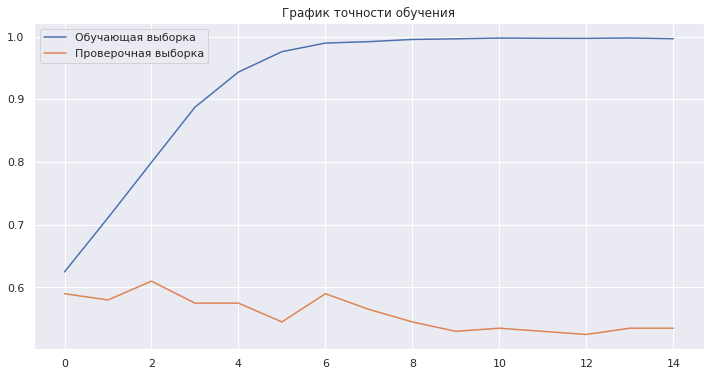

In [ ]:
# Обучение нейронной сети
demo_ai.train_model(epochs=15)

In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Машина супер скоростная. По трассе идет просто отлично! Однозначно брать',
    block_length,
    block_step
    )

Негативные     -  39.1 %
Позитивные     -  60.9 %

Нейросеть думает, что это: Позитивные - 60.9%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Самая быстрая красивая мощная',
    block_length,
    block_step
    )

Негативные     -  37.83 %
Позитивные     -  62.17 %

Нейросеть думает, что это: Позитивные - 62.17%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Обзор не очень, зеркала маленькие, заднее стекло тоже',
    block_length,
    block_step
    )


Негативные     -  37.64 %
Позитивные     -  62.36 %

Нейросеть думает, что это: Позитивные - 62.36%


###**Эксперимент №5 (Embedding)**

In [ ]:
# Задание слоев нейронной сети
layers = f'Эмбеддинг-2-{vocab_size}-{block_length}\
 Выравнивающий\
 Полносвязный-2'

# Создание нейронной сети
demo_ai.create_model(layers, model_type='Embedding')

Создание модели нейронной сети Ok


Эпоха №1    Время обучения: 1.8c    Точность на обучающей выборке: 68.71%    Точность на проверочной выборке: 49.5%
Эпоха №2    Время обучения: 1.35c   Точность на обучающей выборке: 92.37%    Точность на проверочной выборке: 49.0%
Эпоха №3    Время обучения: 1.28c   Точность на обучающей выборке: 98.11%    Точность на проверочной выборке: 51.0%
Эпоха №4    Время обучения: 1.32c   Точность на обучающей выборке: 99.34%    Точность на проверочной выборке: 51.5%
Эпоха №5    Время обучения: 1.32c   Точность на обучающей выборке: 99.81%    Точность на проверочной выборке: 54.0%
Эпоха №6    Время обучения: 1.32c   Точность на обучающей выборке: 99.85%    Точность на проверочной выборке: 51.5%
Эпоха №7    Время обучения: 1.33c   Точность на обучающей выборке: 99.96%    Точность на проверочной выборке: 51.0%
Эпоха №8    Время обучения: 1.29c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 51.5%
Эпоха №9    Время обучения: 1.29c   Точность на обучающей выборке: 100.0

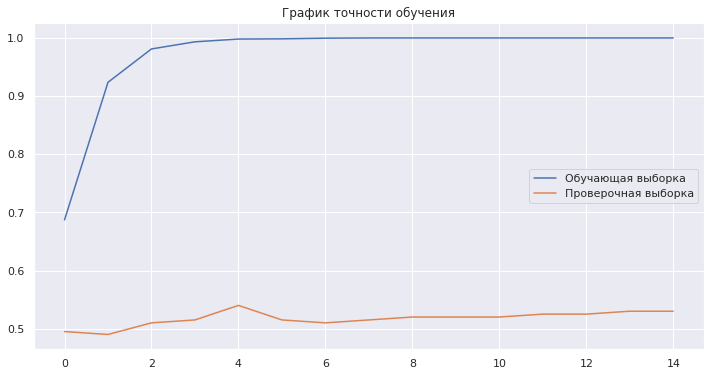

In [ ]:
# Обучение нейронной сети
demo_ai.train_model(epochs=15)

In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Машина супер скоростная. По трассе идет просто отлично! Однозначно брать',
    block_length,
    block_step
    )

Негативные     -  51.05 %
Позитивные     -  48.95 %

Нейросеть думает, что это: Негативные - 51.05%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Самая быстрая красивая мощная',
    block_length,
    block_step
    )

Негативные     -  51.0 %
Позитивные     -  49.0 %

Нейросеть думает, что это: Негативные - 51.0%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Обзор не очень, зеркала маленькие, заднее стекло тоже',
    block_length,
    block_step
    )


Негативные     -  50.88 %
Позитивные     -  49.12 %

Нейросеть думает, что это: Негативные - 50.88%


**Эксперимент №6 (Embedding)**

In [ ]:
# Задание слоев нейронной сети
layers = f'Эмбеддинг-2-{vocab_size}-{block_length}\
 Выравнивающий\
 Полносвязный-256\
 Полносвязный-2'

# Создание нейронной сети
demo_ai.create_model(layers, model_type='Embedding')

Создание модели нейронной сети Ok


Эпоха №1    Время обучения: 1.97c   Точность на обучающей выборке: 78.66%    Точность на проверочной выборке: 53.0%
Эпоха №2    Время обучения: 1.4c    Точность на обучающей выборке: 98.79%    Точность на проверочной выборке: 60.0%
Эпоха №3    Время обучения: 1.34c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 61.0%
Эпоха №4    Время обучения: 1.41c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 63.0%
Эпоха №5    Время обучения: 1.37c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 63.0%
Эпоха №6    Время обучения: 1.35c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 63.5%
Эпоха №7    Время обучения: 1.37c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 63.5%
Эпоха №8    Время обучения: 1.31c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 64.0%
Эпоха №9    Время обучения: 1.42c   Точность на обучающей выборке: 100.0

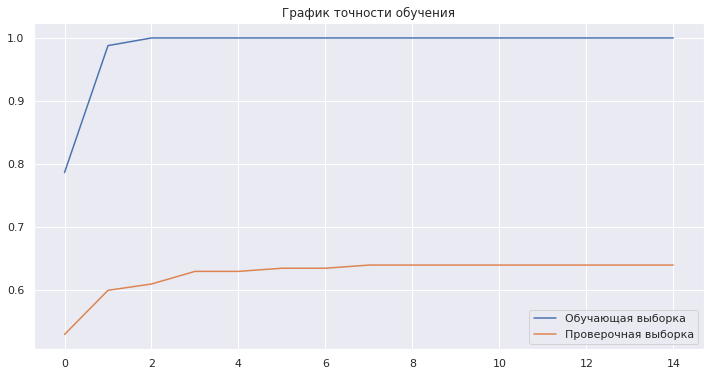

In [ ]:
# Обучение нейронной сети
demo_ai.train_model(epochs=15)

In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Машина супер скоростная. По трассе идет просто отлично! Однозначно брать',
    block_length,
    block_step
    )

Негативные     -  48.15 %
Позитивные     -  51.85 %

Нейросеть думает, что это: Позитивные - 51.85%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Самая быстрая красивая мощная',
    block_length,
    block_step
    )

Негативные     -  48.73 %
Позитивные     -  51.27 %

Нейросеть думает, что это: Позитивные - 51.27%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Обзор не очень, зеркала маленькие, заднее стекло тоже',
    block_length,
    block_step
    )


Негативные     -  49.69 %
Позитивные     -  50.31 %

Нейросеть думает, что это: Позитивные - 50.31%


**Эксперимент №7 (Комбинированная)**

In [ ]:
# Задание слоев нейронной сети
branch_1 = f'Эмбеддинг-2-{vocab_size}-{block_length}\
 Выравнивающий\
 Полносвязный-2'

branch_2 = 'Полносвязный-4\
 Полносвязный-2'

branch_3 = 'Полносвязный-2'

# Создание модели нейронной сети
demo_ai.create_model_combine(branch_1, branch_2, branch_3)

Создание комбинированной модели нейронной сети Ok


Эпоха №1    Время обучения: 2.95c   Точность на обучающей выборке: 78.25%    Точность на проверочной выборке: 79.5%
Эпоха №2    Время обучения: 1.91c   Точность на обучающей выборке: 99.41%    Точность на проверочной выборке: 83.0%
Эпоха №3    Время обучения: 2.76c   Точность на обучающей выборке: 99.86%    Точность на проверочной выборке: 87.0%
Эпоха №4    Время обучения: 3.06c   Точность на обучающей выборке: 99.91%    Точность на проверочной выборке: 85.5%
Эпоха №5    Время обучения: 2.94c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 85.5%
Эпоха №6    Время обучения: 2.87c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 85.0%
Эпоха №7    Время обучения: 3.07c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 85.0%
Эпоха №8    Время обучения: 2.69c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 85.0%
Эпоха №9    Время обучения: 1.86c   Точность на обучающей выборке: 100.0

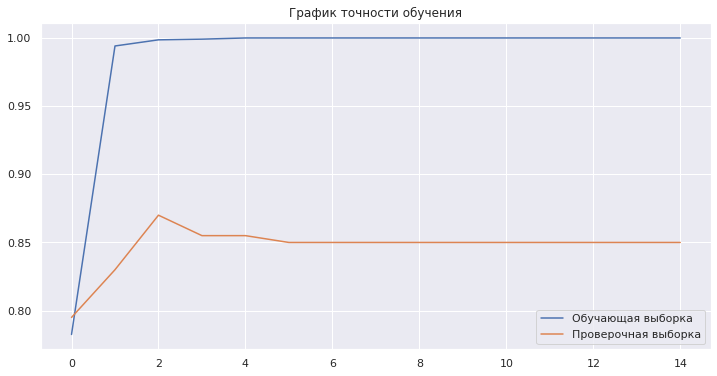

In [ ]:
# Обучение нейронной сети
demo_ai.train_model(epochs=15)

In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Машина супер скоростная. По трассе идет просто отлично! Однозначно брать',
    block_length,
    block_step
    )

Негативные     -  24.9 %
Позитивные     -  75.1 %

Нейросеть думает, что это: Позитивные - 75.1%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Самая быстрая красивая мощная',
    block_length,
    block_step
    )

Негативные     -  34.44 %
Позитивные     -  65.56 %

Нейросеть думает, что это: Позитивные - 65.56%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Обзор не очень, зеркала маленькие, заднее стекло тоже',
    block_length,
    block_step
    )


Негативные     -  74.07 %
Позитивные     -  25.93 %

Нейросеть думает, что это: Негативные - 74.07%


**Эксперимент №8 (Комбинированная)**

In [ ]:
# Задание слоев нейронной сети
branch_1 = f'Эмбеддинг-50-{vocab_size}-{block_length}\
 Выравнивающий\
 Полносвязный-16'

branch_2 = 'Полносвязный-64\
 Полносвязный-32\
 Полносвязный-16'

branch_3 = 'Полносвязный-32'

# Создание модели нейронной сети
demo_ai.create_model_combine(branch_1, branch_2, branch_3)

Создание комбинированной модели нейронной сети Ok


Эпоха №1    Время обучения: 2.86c   Точность на обучающей выборке: 90.85%    Точность на проверочной выборке: 81.5%
Эпоха №2    Время обучения: 2.04c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 82.0%
Эпоха №3    Время обучения: 1.98c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 82.0%
Эпоха №4    Время обучения: 2.36c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 82.5%
Эпоха №5    Время обучения: 2.02c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 82.5%
Эпоха №6    Время обучения: 1.97c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 82.5%
Эпоха №7    Время обучения: 1.98c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 82.0%
Эпоха №8    Время обучения: 1.98c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 82.0%
Эпоха №9    Время обучения: 2.03c   Точность на обучающей выборке: 100.0

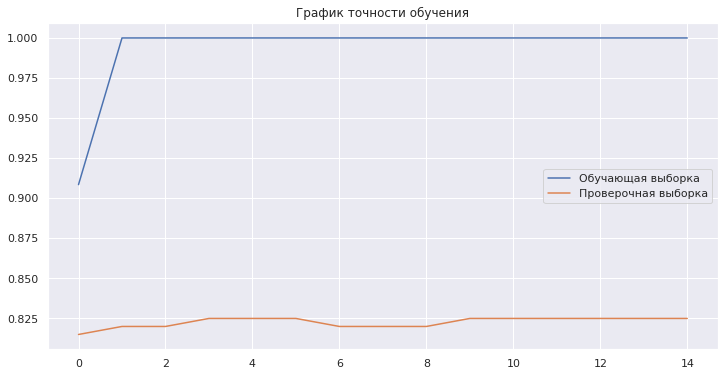

In [ ]:
# Обучение нейронной сети
demo_ai.train_model(epochs=15)

In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Машина супер скоростная. По трассе идет просто отлично! Однозначно брать',
    block_length,
    block_step
    )

Негативные     -  47.13 %
Позитивные     -  52.87 %

Нейросеть думает, что это: Позитивные - 52.87%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Самая быстрая красивая мощная',
    block_length,
    block_step
    )

Негативные     -  54.18 %
Позитивные     -  45.82 %

Нейросеть думает, что это: Негативные - 54.18%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Обзор не очень, зеркала маленькие, заднее стекло тоже',
    block_length,
    block_step
    )


Негативные     -  77.25 %
Позитивные     -  22.75 %

Нейросеть думает, что это: Негативные - 77.25%


**Эксперимент №9 (Комбинированная)**

In [ ]:
# Задание слоев нейронной сети
branch_1 = f'Эмбеддинг-100-{vocab_size}-{block_length}\
 Выравнивающий\
 Полносвязный-32'

branch_2 = 'Полносвязный-128\
 Полносвязный-64\
 Полносвязный-32'

branch_3 = 'Полносвязный-32'

# Создание модели нейронной сети
demo_ai.create_model_combine(branch_1, branch_2, branch_3)

Создание комбинированной модели нейронной сети Ok


Эпоха №1    Время обучения: 2.9c    Точность на обучающей выборке: 94.31%    Точность на проверочной выборке: 82.0%
Эпоха №2    Время обучения: 2.11c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.0%
Эпоха №3    Время обучения: 2.06c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.5%
Эпоха №4    Время обучения: 2.07c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.0%
Эпоха №5    Время обучения: 2.02c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.0%
Эпоха №6    Время обучения: 2.04c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 83.5%
Эпоха №7    Время обучения: 2.05c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 83.5%
Эпоха №8    Время обучения: 2.1c    Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 83.5%
Эпоха №9    Время обучения: 2.02c   Точность на обучающей выборке: 100.0

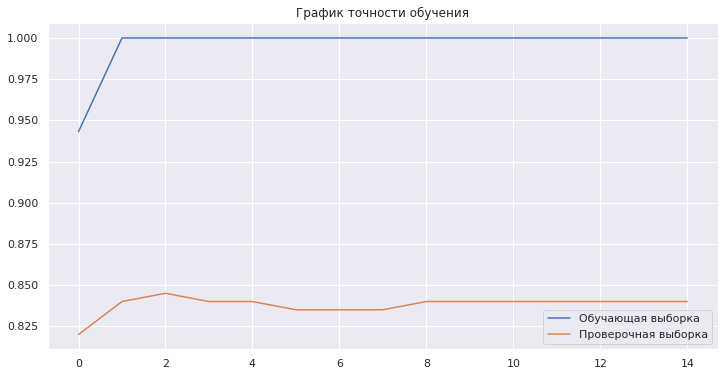

In [ ]:
# Обучение нейронной сети
demo_ai.train_model(epochs=15)

In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Машина супер скоростная. По трассе идет просто отлично! Однозначно брать',
    block_length,
    block_step
    )

Негативные     -  14.06 %
Позитивные     -  85.94 %

Нейросеть думает, что это: Позитивные - 85.94%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Самая быстрая красивая мощная',
    block_length,
    block_step
    )

Негативные     -  23.48 %
Позитивные     -  76.52 %

Нейросеть думает, что это: Позитивные - 76.52%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Обзор не очень, зеркала маленькие, заднее стекло тоже',
    block_length,
    block_step
    )


Негативные     -  48.31 %
Позитивные     -  51.69 %

Нейросеть думает, что это: Позитивные - 51.69%


**Эксперимент №10 (Комбинированная)**

In [ ]:
# Задание слоев нейронной сети
branch_1 = f'Эмбеддинг-100-{vocab_size}-{block_length}\
 Выравнивающий\
 Полносвязный-100'

branch_2 = 'Полносвязный-1024\
 Полносвязный-256\
 Полносвязный-64'

branch_3 = 'Полносвязный-100'

# Создание модели нейронной сети
demo_ai.create_model_combine(branch_1, branch_2, branch_3)

Создание комбинированной модели нейронной сети Ok


Эпоха №1    Время обучения: 3.72c   Точность на обучающей выборке: 96.45%    Точность на проверочной выборке: 83.5%
Эпоха №2    Время обучения: 2.76c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 83.5%
Эпоха №3    Время обучения: 2.8c    Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.0%
Эпоха №4    Время обучения: 2.81c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.0%
Эпоха №5    Время обучения: 2.76c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.0%
Эпоха №6    Время обучения: 3.35c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.0%
Эпоха №7    Время обучения: 2.82c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.0%
Эпоха №8    Время обучения: 3.69c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.0%
Эпоха №9    Время обучения: 2.8c    Точность на обучающей выборке: 100.0

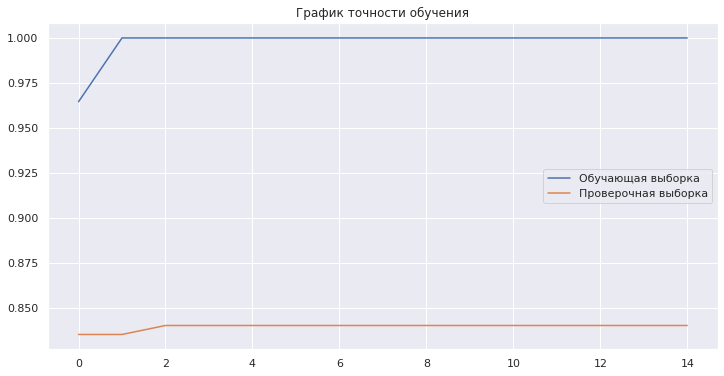

In [ ]:
# Обучение нейронной сети
demo_ai.train_model(epochs=15)

In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Машина супер скоростная. По трассе идет просто отлично! Однозначно брать',
    block_length,
    block_step
    )

Негативные     -  17.46 %
Позитивные     -  82.54 %

Нейросеть думает, что это: Позитивные - 82.54%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Самая быстрая красивая мощная',
    block_length,
    block_step
    )

Негативные     -  35.57 %
Позитивные     -  64.43 %

Нейросеть думает, что это: Позитивные - 64.43%


In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    'Обзор не очень, зеркала маленькие, заднее стекло тоже',
    block_length,
    block_step
    )


Негативные     -  72.19 %
Позитивные     -  27.81 %

Нейросеть думает, что это: Негативные - 72.19%


## **Определение стоимости квартиры в Москве**

In [ ]:
# Загрузка датасета
demo_ai.load_dataset('Квартиры')

Загрузка датасета Ok
Ифно:
    Вы скачали информационную базу стоимости квартир в г. Москва. База содержит информацию о 62504 квартирах


In [ ]:
# Вывод примеров
demo_ai.samples()

* Пример объявления: 

Количество комнат:  1
Площадь квартиры:   28/?/?
Метро/ЖД станция:   Столбово м.
От станции:         4т
Дом:                1/5 П
Балкон:             
Санузел:            
Примечание:         Прoдаётcя oднoкомнaтнaя кваpтиpa в пocёлкe Ватутинки , Mоcква. Зeлёный квaртaл, в пешeй дoступноcти школы, дeтcкий caд и магaзины , рaзвитaя инфpacтруктурa. B скором вpемeни будeт метро.
-----------
Цена квартиры:     5 млн  99 тыс рублей
---------------------------------------------------------------------------------------------------------------

* Пример объявления: 

Количество комнат:  1
Площадь квартиры:   39/?/10
Метро/ЖД станция:   Столбово м.
От станции:         nan
Дом:                3/12 М
Балкон:             
Санузел:            
Примечание:         ВАТУТИНКИ. Квартира в НОВОСТРОЙКЕ. НОВАЯ МОСКВА. ПРОПИСКА МОСКВА. ЖК КОМФОРТ КЛАССА. МЕТРО скоро. ПЕШКОМ. СКОРО. ИПОТЕКА. МОЖНО С ОТДЕЛКОЙ. ДДУ ФЗ 214. ОБРАЩАЙТЕСЬ.
-----------
Цена квартиры:     3 млн  350 тыс рубл

In [ ]:
# Создание обучающей и проверочной выборок
demo_ai.create_sets()


Размер созданных выборок:
Ветвь 1
  Обучающая выборка: (49954, 109)
  Метки обучающей выборки: (49954, 1)
  Проверочная выборка: (12550, 109)
  Метки проверочной выборки: (12550, 1)
Ветвь 2
  Обучающая выборка: (49954, 2000)
  Метки обучающей выборки: (49954, 1)
  Проверочная выборка: (12550, 2000)
  Метки проверочной выборки: (12550, 1)



In [ ]:
# Задание слоев нейронной сети
branch_1 = f'Полносвязный-100\
 Полносвязный-50'

branch_2 = 'Полносвязный-500'

finally_branch_3 = 'Полносвязный-1000\
 Полносвязный-500\
 Полносвязный-100\
 Полносвязный-1'

# Создание модели нейронной сети
demo_ai.create_model_combine(branch_1, branch_2, finally_branch_3)

Создание комбинированной модели нейронной сети Ok


Эпоха №1  Время обучения: 29.27c Ошибка на обучающей выборке: 1.72млн        Ошибка на проверочной выборке: 1.738млн
Эпоха №2  Время обучения: 27.08c Ошибка на обучающей выборке: 1.548млн       Ошибка на проверочной выборке: 1.596млн
Эпоха №3  Время обучения: 25.77c Ошибка на обучающей выборке: 1.414млн       Ошибка на проверочной выборке: 1.567млн
Эпоха №4  Время обучения: 26.25c Ошибка на обучающей выборке: 1.848млн       Ошибка на проверочной выборке: 1.961млн
Эпоха №5  Время обучения: 27.91c Ошибка на обучающей выборке: 0.993млн       Ошибка на проверочной выборке: 1.155млн
Эпоха №6  Время обучения: 28.4c  Ошибка на обучающей выборке: 0.88млн        Ошибка на проверочной выборке: 1.103млн
Эпоха №7  Время обучения: 28.04c Ошибка на обучающей выборке: 1.024млн       Ошибка на проверочной выборке: 1.227млн
Эпоха №8  Время обучения: 26.87c Ошибка на обучающей выборке: 0.994млн       Ошибка на проверочной выборке: 1.154млн
Эпоха №9  Время обучения: 27.54c Ошибка на обучающей выборке: 0.

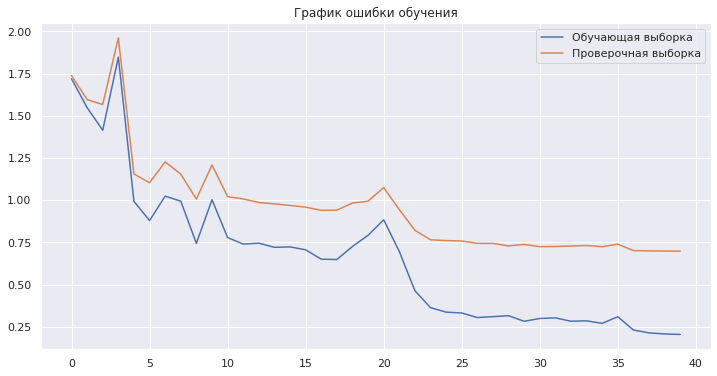

In [ ]:
# Обучение нейронной сети
demo_ai.train_model(epochs=40)

In [ ]:
#@title Тестирование модели: выберите параметры
метро = "\u0421\u043F\u0430\u0440\u0442\u0430\u043A \u043C." #@param ['Авиамоторная м.', 'Автозаводская м.', 'Автозаводская м. (МЦК)', 'Академическая м.', 'Алабушево станция', 'Александровский Сад м.', 'Алексеевская м.', 'Алма-Атинская м.', 'Алтуфьево м.', 'Андроновка м. (МЦК)', 'Аннино м.', 'Апрелевка станция', 'Арбатская м.', 'Аэропорт (старая) станция', 'Аэропорт Внуково станция', 'Аэропорт м.', 'Бабушкинская м.', 'Багратионовская м.', 'Балтийская м. (МЦК)', 'Баррикадная м.', 'Бауманская м.', 'Беговая м.', 'Бекасово-1 станция', 'Белокаменная м. (МЦК)', 'Беломорская м.', 'Белорусская м.', 'Беляево м.', 'Бибирево м.', 'Библиотека им.Ленина м.', 'Битцевский парк м.', 'Борисово м.', 'Боровицкая м.', 'Боровское шоссе м.', 'Ботанический сад м.', 'Ботанический сад м. (МЦК)', 'Братиславская м.', 'Бульвар Адмирала Ушакова м.', 'Бульвар Дмитрия Донского м.', 'Бульвар Рокоссовского м.', 'Бульвар Рокоссовского м. (МЦК)', 'Бунинская аллея м.', 'Бутырская м.', 'ВДНХ м.', 'Варшавская м.', 'Верхние Котлы м. (МЦК)', 'Верхние Лихоборы м.', 'Весенняя станция', 'Владыкино м.', 'Внуково станция', 'Водный стадион м.', 'Войковская м.', 'Волгоградский проспект м.', 'Волжская м.', 'Волоколамская м.', 'Воробьевы Горы м.', 'Выставочная м.', 'Выхино м.', 'Говорово м.', 'Гривно станция', 'Дачная станция', 'Деловой центр м.', 'Динамо м.', 'Дмитровская м.', 'Добрынинская м.', 'Домодедовская м.', 'Достоевская м.', 'Дубровка м.', 'Дубровка м. (МЦК)', 'Жулебино м.', 'ЗИЛ м. (МЦК)', 'Зорге м. (МЦК)', 'Зябликово м.', 'Измайлово м. (МЦК)', 'Измайловская м.', 'Калужская м.', 'Кантемировская м.', 'Каховская м.', 'Каширская м.', 'Киевская м.', 'Китай-Город м.', 'Кожуховская м.', 'Кокошкино станция', 'Коломенская м.', 'Колхозная станция', 'Коммунарка м.', 'Комсомольская м.', 'Коньково м.', 'Коптево м. (МЦК)', 'Косино м.', 'Котельники м.', 'Красногвардейская м.', 'Краснопресненская м.', 'Красносельская м.', 'Красные ворота м.', 'Крекшино станция', 'Крестьянская Застава м.', 'Кропоткинская м.', 'Крылатское м.', 'Крымская м. (МЦК)', 'Кузнецкий мост м.', 'Кузьминки м.', 'Кунцевская м.', 'Курская м.', 'Кутузовская м.', 'Кутузовская м. (МЦК)', 'Ленинский проспект м.', 'Лермонтовский проспект м.', 'Лесопарковая м.', 'Лихоборы м. (МЦК)', 'Локомотив м. (МЦК)', 'Ломоносовский проспект м.', 'Лубянка м.', 'Лужники м. (МЦК)', 'Лухмановская м.', 'Львовская станция', 'Люблино м.', 'Марксистская м.', 'Марьина Роща м.', 'Марьино м.', 'Маяковская м.', 'Медведково м.', 'Международная м.', 'Менделеевская м.', 'Минская м.', 'Митино м.', 'Мичуринец станция', 'Мичуринский проспект м.', 'Молодежная м.', 'Мякинино м.', 'Нагатинская м.', 'Нагорная м.', 'Нахимовский проспект м.', 'Некрасовка м.', 'Нижегородская м. (МЦК)', 'Нижегородская улица м.', 'Новогиреево м.', 'Новокосино м.', 'Новокузнецкая м.', 'Новопеределкино м.', 'Новослободская м.', 'Новохохловская м. (МЦК)', 'Новоясеневская м.', 'Новые Черемушки м.', 'Озерная м.', 'Окружная м.', 'Окружная м. (МЦК)', 'Окская улица м.', 'Октябрьская м.', 'Октябрьское поле м.', 'Ольховая м.', 'Орехово м.', 'Отрадное м.', 'Охотный ряд м.', 'Павелецкая м.', 'Панфиловская м. (МЦК)', 'Парк Победы м.', 'Парк культуры м.', 'Партизанская м.', 'Первомайская м.', 'Перово м.', 'Петровский парк м.', 'Петровско-Разумовская м.', 'Печатники м.', 'Пионерская м.', 'Планерная м.', 'Площадь Гагарина м. (МЦК)', 'Площадь Ильича м.', 'Площадь Революции м.', 'Победа станция', 'Подольск станция', 'Полежаевская м.', 'Полянка м.', 'Пражская м.', 'Преображенская площадь м.', 'Прокшино м.', 'Пролетарская м.', 'Проспект Вернадского м.', 'Проспект Мира м.', 'Профсоюзная м.', 'Пушкинская м.', 'Пятницкое шоссе м.', 'Раменки м.', 'Рассказовка м.', 'Рассудово станция', 'Речной вокзал м.', 'Рижская м.', 'Римская м.', 'Ростокино м. (МЦК)', 'Румянцево м.', 'Рязанский проспект м.', 'Савеловская м.', 'Савеловская метро', 'Саларьево м.', 'Свиблово м.', 'Севастопольская м.', 'Селигерская м.', 'Семеновская м.', 'Серпуховская м.', 'Силикатная станция', 'Славянский бульвар м.', 'Смоленская м.', 'Сокол м.', 'Соколиная Гора м. (МЦК)', 'Сокольники м.', 'Солнцево м.', 'Спартак м.', 'Спортивная м.', 'Сретенский бульвар м.', 'Стахановская м.', 'Столбово м.', 'Стрешнево м. (МЦК)', 'Строгино м.', 'Студенческая м.', 'Сухаревская м.', 'Сходненская м.', 'Таганская м.', 'Тверская м.', 'Театральная м.', 'Текстильщики м.', 'Теплый стан м.', 'Технопарк м.', 'Тимирязевская м.', 'Толстопальцево станция', 'Третьяковская м.', 'Тропарево м.', 'Трубная м.', 'Тульская м.', 'Тургеневская м.', 'Тушинская м.', 'Угрешская м. (МЦК)', 'Улица 1905 года м.', 'Улица Академика Янгеля м.', 'Улица Горчакова м.', 'Улица Дмитриевского м.', 'Улица Скобелевская м.', 'Улица Старокачаловская м.', 'Университет м.', 'Филатов луг м.', 'Филевский парк м.', 'Фили м.', 'Фонвизинская м.', 'Фрунзенская м.', 'Ховрино м.', 'Хорошево м. (МЦК)', 'Хорошевское м.', 'ЦСКА м.', 'Царицыно м.', 'Цветной бульвар м.', 'Черкизовская м.', 'Чертановская м.', 'Чеховская м.', 'Чистые пруды м.', 'Чкаловская м.', 'Шаболовская м.', 'Шелепиха м.', 'Шелепиха м. (МЦК)', 'Шипиловская м.', 'Шоссе Энтузиастов м.', 'Шоссе Энтузиастов м. (МЦК)', 'Щелковская м.', 'Щербинка станция', 'Щукинская м.', 'Электрозаводская м.', 'Юго-Восточная м.', 'Юго-Западная м.', 'Южная м.', 'Ясенево м.']
до_станции =  4#@param {type:"integer"}
способ_передвижения = "\u043F\u0435\u0448\u043A\u043E\u043C" #@param ['пешком', 'транспорт']
этаж =  1#@param {type:"integer"}
всего_этажей =  14#@param {type:"integer"}
тип_балкона = 'Л' #@param ['Л', 'Б', '2Б', '-', '2Б2Л', 'БЛ', '3Б', '2Л', 'Эрк', 'Б2Л', 'ЭркЛ', '3Л', '4Л', '*Л', '*Б']
тип_санузла = '2' #@param ['2', 'Р', 'С', '-', '2С', '+', '4Р', '2Р', '3С', '4С', '4', '3', '3Р']
площадь = 87 #@param {type:"number"}
описание = '\u043F\u0440\u0435\u043A\u0440\u0430\u0441\u043D\u0430\u044F \u043A\u0432\u0430\u0440\u0442\u0438\u0440\u0430 \u0440\u044F\u0434\u043E\u043C \u0441 \u043F\u0430\u0440\u043A\u043E\u043C' #@param {type:"string"}

In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model(
    метро,
    до_станции,
    способ_передвижения,
    этаж,
    всего_этажей,
    тип_балкона,
    тип_санузла,
    площадь,
    описание
    )

Цена квартиры: 17млн  528тыс рублей


## **Подбор кандидата на должность менеджера по продажам**

In [ ]:
# Загрузка датасета
demo_ai.load_dataset('Вакансии')

Загрузка датасета Ok
Ифно:
    Вы скачали базу вакансий. База содержит информацию о 62504 ползователях


In [ ]:
# Вывод примеров
demo_ai.samples()

Пример резюме:

Пол:                         Ж
Возраст:                     26
Город:                       Шымкент
Готовность к переезду:       готов к переезду
Готовность к командировкам:  готов к командировкам
Гражданство:                 Казахстан
Разрешение на работу:        Казахстан
Знания языков:               Казахский Английский Русский Турецкий
Образование:                 Высшее образование
Дополнительное образование:  Школа бизнеса «Синегрия»
Зарплата:                    54000.0
Время в пути до работы:      не имеет значения
Занятость:                   полная занятость
График:                      полный день
Опыт работы (мес):           109
Обязанности на пред.работе:  Продажа пакетов обучения, выполнение плана., руководство отделом продаж;планирование работы отдела (
                             идеология, цели, задачи, мотивация);подбор, адаптация и обучение сотрудников;поиск и привлечение кли
                             ентов;составление отчетности;ведение, поддержан


Размер созданных выборок:
  Обучающая выборка: (500, 483)
  Метки обучающей выборки: (500, 2)
  Проверочная выборка: (264, 483)
  Метки проверочной выборки: (264, 2)
Распределение по классам:


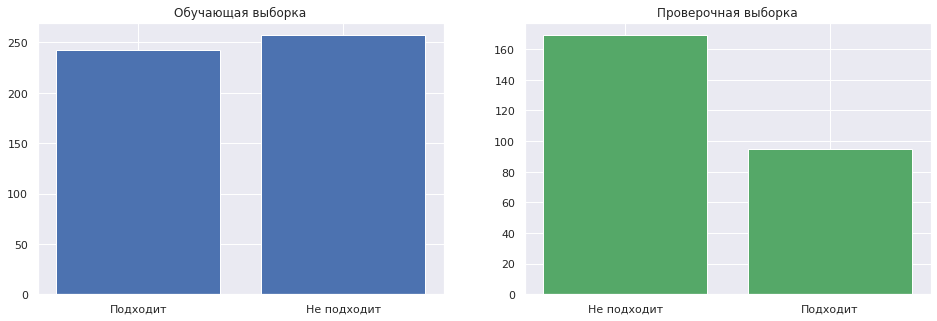

In [ ]:
# Создание обучающей и проверочной выборок
demo_ai.create_sets()

In [ ]:
# Задание слоев нейронной сети
layers = f'Полносвязный-128\
 Полносвязный-2'

# Создание модели нейронной сети
demo_ai.create_model(layers)

Создание модели нейронной сети Ok


Эпоха 1   Время обучения: 0.9c     Точность на обучающей выборке: 47.6%     Точность на проверочной выборке: 45.45%
Эпоха 2   Время обучения: 0.1c     Точность на обучающей выборке: 50.0%     Точность на проверочной выборке: 46.97%
Эпоха 3   Время обучения: 0.1c     Точность на обучающей выборке: 52.2%     Точность на проверочной выборке: 48.48%
Эпоха 4   Время обучения: 0.1c     Точность на обучающей выборке: 52.6%     Точность на проверочной выборке: 48.11%
Эпоха 5   Время обучения: 0.1c     Точность на обучающей выборке: 54.2%     Точность на проверочной выборке: 52.65%
Эпоха 6   Время обучения: 0.1c     Точность на обучающей выборке: 56.2%     Точность на проверочной выборке: 53.79%
Эпоха 7   Время обучения: 0.1c     Точность на обучающей выборке: 58.2%     Точность на проверочной выборке: 57.95%
Эпоха 8   Время обучения: 0.1c     Точность на обучающей выборке: 62.4%     Точность на проверочной выборке: 57.58%
Эпоха 9   Время обучения: 0.1c     Точность на обучающей выборке: 64.0% 

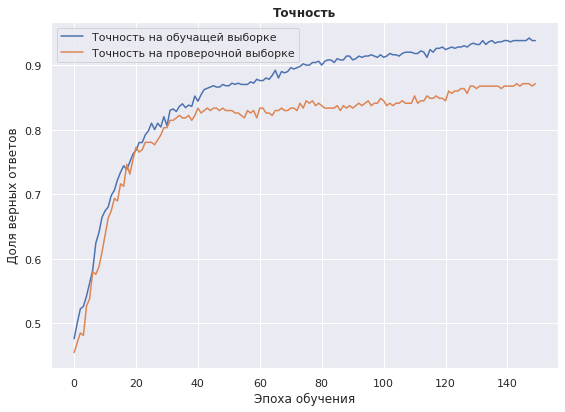

In [ ]:
# Обучение нейронной сети
demo_ai.train_model(epochs=150)

Определение среднего показателя точности модели на 10 запусках

Запуск 1  Время обучения: 11.0c    Точность на обучающей выборке: 94.6%     Точность на проверочной выборке: 86.36%
Запуск 2  Время обучения: 10.9c    Точность на обучающей выборке: 94.0%     Точность на проверочной выборке: 88.64%
Запуск 3  Время обучения: 11.2c    Точность на обучающей выборке: 94.2%     Точность на проверочной выборке: 86.74%
Запуск 4  Время обучения: 20.9c    Точность на обучающей выборке: 93.6%     Точность на проверочной выборке: 88.64%
Запуск 5  Время обучения: 11.7c    Точность на обучающей выборке: 94.2%     Точность на проверочной выборке: 87.12%
Запуск 6  Время обучения: 12.6c    Точность на обучающей выборке: 94.2%     Точность на проверочной выборке: 88.26%
Запуск 7  Время обучения: 20.9c    Точность на обучающей выборке: 94.2%     Точность на проверочной выборке: 86.74%
Запуск 8  Время обучения: 20.8c    Точность на обучающей выборке: 94.6%     Точность на проверочной выборке: 87.12%
Запуск 9

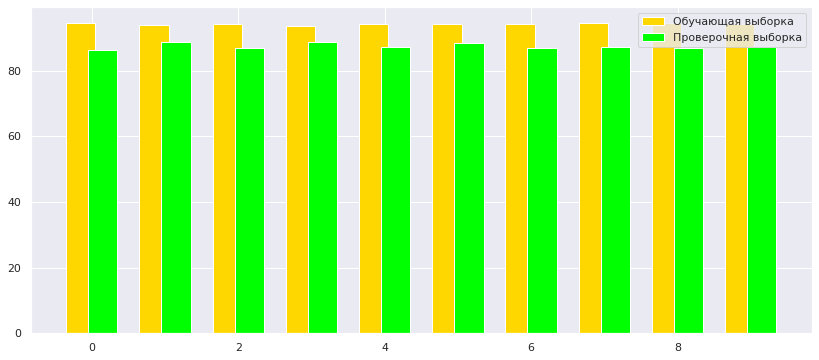


Средняя точность на обучающей выборке: 94.2%
Средняя точность на проверочной выборке: 87.12%


In [ ]:
demo_ai.train_model_average(layers)

In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model()

Тестирование модели на случайном примере тестовой выборки: 

Тестовое резюме:

Пол:                         М
Возраст:                     37
Город:                       Москва
Готовность к переезду:       готов к переезду
Готовность к командировкам:  готов к командировкам
Гражданство:                 Россия
Разрешение на работу:        Россия
Знания языков:               Русский Английский
Образование:                 Высшее образование
Дополнительное образование:  Данные не указаны
Зарплата:                    30000.0
Время в пути до работы:      не более часа
Занятость:                   полная занятость
График:                      удаленная работа, полный день
Опыт работы (мес):           143
Обязанности на пред.работе:  Найм, обучение и адаптация сотрудников.Организация работы отдела ( управление, постановка задач, кон
                             троль).Выполнение планов по продажам.Написанию скриптов.Участие в сложных переговорах с клиентами.Со
                             гла

Эпоха 1   Время обучения: 0.6c     Точность на обучающей выборке: 51.0%     Точность на проверочной выборке: 60.61%
Эпоха 2   Время обучения: 0.1c     Точность на обучающей выборке: 53.8%     Точность на проверочной выборке: 59.47%
Эпоха 3   Время обучения: 0.1c     Точность на обучающей выборке: 56.2%     Точность на проверочной выборке: 60.23%
Эпоха 4   Время обучения: 0.1c     Точность на обучающей выборке: 59.4%     Точность на проверочной выборке: 62.12%
Эпоха 5   Время обучения: 0.1c     Точность на обучающей выборке: 60.6%     Точность на проверочной выборке: 64.77%
Эпоха 6   Время обучения: 0.1c     Точность на обучающей выборке: 62.2%     Точность на проверочной выборке: 65.91%
Эпоха 7   Время обучения: 0.1c     Точность на обучающей выборке: 64.4%     Точность на проверочной выборке: 67.8%
Эпоха 8   Время обучения: 0.1c     Точность на обучающей выборке: 66.4%     Точность на проверочной выборке: 70.08%
Эпоха 9   Время обучения: 0.1c     Точность на обучающей выборке: 68.4%  

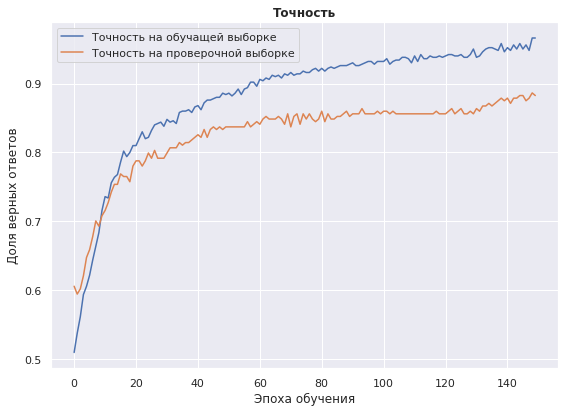

In [ ]:
# Задание слоев нейронной сети
layers = f'Полносвязный-256\
 Полносвязный-2'

# Создание модели нейронной сети
demo_ai.create_model(layers)

# Обучение нейронной сети
demo_ai.train_model(epochs=150)

Определение среднего показателя точности модели на 10 запусках

Запуск 1  Время обучения: 13.3c    Точность на обучающей выборке: 96.2%     Точность на проверочной выборке: 88.64%
Запуск 2  Время обучения: 13.2c    Точность на обучающей выборке: 96.2%     Точность на проверочной выборке: 89.02%
Запуск 3  Время обучения: 13.4c    Точность на обучающей выборке: 96.8%     Точность на проверочной выборке: 89.02%
Запуск 4  Время обучения: 20.9c    Точность на обучающей выборке: 96.6%     Точность на проверочной выборке: 87.5%
Запуск 5  Время обучения: 13.1c    Точность на обучающей выборке: 96.0%     Точность на проверочной выборке: 88.26%
Запуск 6  Время обучения: 20.8c    Точность на обучающей выборке: 96.2%     Точность на проверочной выборке: 87.88%
Запуск 7  Время обучения: 13.4c    Точность на обучающей выборке: 95.8%     Точность на проверочной выборке: 87.88%
Запуск 8  Время обучения: 13.2c    Точность на обучающей выборке: 96.0%     Точность на проверочной выборке: 87.12%
Запуск 9 

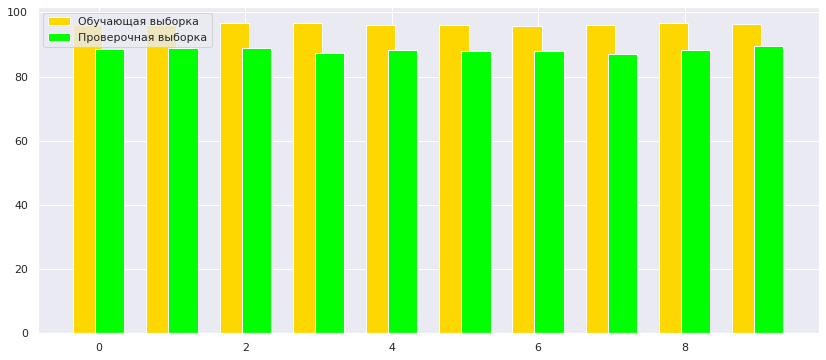


Средняя точность на обучающей выборке: 96.4%
Средняя точность на проверочной выборке: 89.39%


In [ ]:
demo_ai.train_model_average(layers)

In [ ]:
# Демонстрация результата работы нейронной сети
demo_ai.test_model()

Тестирование модели на случайном примере тестовой выборки: 

Тестовое резюме:

Пол:                         М
Возраст:                     26
Город:                       Москва
Готовность к переезду:       не готов к переезду
Готовность к командировкам:  готов к командировкам
Гражданство:                 Россия
Разрешение на работу:        Великобритания, Россия
Знания языков:               Русский Английский
Образование:                 Высшее образование
Дополнительное образование:  Данные не указаны
Зарплата:                    100000.0
Время в пути до работы:      не более часа
Занятость:                   полная занятость
График:                      полный день
Опыт работы (мес):           63
Обязанности на пред.работе:  Providing financial solutions for EU countries + UKInformational support and support at the stage of
                              opening an accountClients consulting on the use of our products and servicesLinkedin professional, 
                             Ma